In [ ]:
pip install requests


In [ ]:
pip install yfinance

In [3]:
import os

In [ ]:
pip install openpyxl

In [ ]:
pip install beautifulsoup4

In [6]:
import requests
from bs4 import BeautifulSoup
import openpyxl

In [7]:
import matplotlib as plt
import seaborn as sns

In [8]:
#importing libraries
import pandas as pd

import yfinance as yf
import requests
from bs4 import BeautifulSoup

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
import pandas as pd
import numpy as np

In [10]:
data = "jiofin_hist_290823.csv"

share_data = pd.read_csv(data, sep=',', quotechar='"')

print(share_data)

         Date  series    OPEN    HIGH     LOW   PREV. CLOSE     ltp   close   \
0  28-Aug-2023      BE  213.35  222.25  207.55        214.50  210.10  211.15   
1  25-Aug-2023      BE  202.80  224.10  202.80        213.45  221.60  214.50   
2  24-Aug-2023      BE  213.45  213.45  213.45        224.65  213.45  213.45   
3  23-Aug-2023      BE  224.65  224.65  224.65        236.45  224.65  224.65   
4  22-Aug-2023      BE  236.45  236.45  236.45        248.90  236.45  236.45   
5  21-Aug-2023      BE  262.00  262.05  248.90        261.85  248.90  248.90   

    vwap   52W H   52W L       VOLUME              VALUE  No of trades   
0  216.13  262.05  202.80   87,522,126  18,916,412,848.50       614,341  
1  208.11  262.05  202.80  281,040,185  58,486,553,466.05       668,251  
2  213.45  262.05  213.45   27,673,356   5,906,877,838.20        85,618  
3  224.65  262.05  224.65    4,289,046     963,534,183.90        70,571  
4  236.45  262.05  236.45    7,281,398   1,721,686,557.10        88,6

In [11]:
share_data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Aug-2023,BE,213.35,222.25,207.55,214.50,210.10,211.15,216.13,262.05,202.80,"87,522,126","18,916,412,848.50","614,341"
1,25-Aug-2023,BE,202.80,224.10,202.80,213.45,221.60,214.50,208.11,262.05,202.80,"281,040,185","58,486,553,466.05","668,251"
2,24-Aug-2023,BE,213.45,213.45,213.45,224.65,213.45,213.45,213.45,262.05,213.45,"27,673,356","5,906,877,838.20","85,618"
3,23-Aug-2023,BE,224.65,224.65,224.65,236.45,224.65,224.65,224.65,262.05,224.65,"4,289,046","963,534,183.90","70,571"
4,22-Aug-2023,BE,236.45,236.45,236.45,248.90,236.45,236.45,236.45,262.05,236.45,"7,281,398","1,721,686,557.10","88,607"


In [12]:
share_data.tail()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1,25-Aug-2023,BE,202.80,224.10,202.80,213.45,221.60,214.50,208.11,262.05,202.80,"281,040,185","58,486,553,466.05","668,251"
2,24-Aug-2023,BE,213.45,213.45,213.45,224.65,213.45,213.45,213.45,262.05,213.45,"27,673,356","5,906,877,838.20","85,618"
3,23-Aug-2023,BE,224.65,224.65,224.65,236.45,224.65,224.65,224.65,262.05,224.65,"4,289,046","963,534,183.90","70,571"
4,22-Aug-2023,BE,236.45,236.45,236.45,248.90,236.45,236.45,236.45,262.05,236.45,"7,281,398","1,721,686,557.10","88,607"
5,21-Aug-2023,BE,262.00,262.05,248.90,261.85,248.90,248.90,253.78,262.05,248.90,"74,715,306","18,961,288,026.65","347,015"


In [13]:
share_data.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00,6.000000
mean,225.450000,230.491667,222.300000,233.300000,225.858333,224.850000,225.428333,262.05,221.508333
std,21.264877,17.115794,17.829414,19.445668,14.594431,15.084926,17.063201,0.00,18.699557
min,202.800000,213.450000,202.800000,213.450000,210.100000,211.150000,208.110000,262.05,202.800000
25%,213.375000,222.712500,209.025000,217.037500,215.487500,213.712500,214.120000,262.05,205.462500
50%,219.050000,224.375000,219.050000,230.550000,223.125000,219.575000,220.390000,262.05,219.050000
75%,233.500000,233.500000,233.500000,245.787500,233.500000,233.500000,233.500000,262.05,233.500000
max,262.000000,262.050000,248.900000,261.850000,248.900000,248.900000,253.780000,262.05,248.900000


In [14]:
share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6 non-null      object 
 1   series         6 non-null      object 
 2   OPEN           6 non-null      float64
 3   HIGH           6 non-null      float64
 4   LOW            6 non-null      float64
 5   PREV. CLOSE    6 non-null      float64
 6   ltp            6 non-null      float64
 7   close          6 non-null      float64
 8   vwap           6 non-null      float64
 9   52W H          6 non-null      float64
 10  52W L          6 non-null      float64
 11  VOLUME         6 non-null      object 
 12  VALUE          6 non-null      object 
 13  No of trades   6 non-null      object 
dtypes: float64(9), object(5)
memory usage: 800.0+ bytes


In [15]:
share_data.isnull().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [16]:
share_data.rename(columns={'Date ': 'Date'}, inplace=True)

share_data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Aug-2023,BE,213.35,222.25,207.55,214.50,210.10,211.15,216.13,262.05,202.80,"87,522,126","18,916,412,848.50","614,341"
1,25-Aug-2023,BE,202.80,224.10,202.80,213.45,221.60,214.50,208.11,262.05,202.80,"281,040,185","58,486,553,466.05","668,251"
2,24-Aug-2023,BE,213.45,213.45,213.45,224.65,213.45,213.45,213.45,262.05,213.45,"27,673,356","5,906,877,838.20","85,618"
3,23-Aug-2023,BE,224.65,224.65,224.65,236.45,224.65,224.65,224.65,262.05,224.65,"4,289,046","963,534,183.90","70,571"
4,22-Aug-2023,BE,236.45,236.45,236.45,248.90,236.45,236.45,236.45,262.05,236.45,"7,281,398","1,721,686,557.10","88,607"


In [17]:
print(share_data.columns.tolist())

['Date', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades ']


In [18]:
share_data = share_data.rename(columns=lambda x: x.strip())


In [19]:
print(share_data.columns.tolist())

['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades']


In [20]:
share_data['Date'] = pd.to_datetime(share_data['Date'])

In [21]:
share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6 non-null      datetime64[ns]
 1   series        6 non-null      object        
 2   OPEN          6 non-null      float64       
 3   HIGH          6 non-null      float64       
 4   LOW           6 non-null      float64       
 5   PREV. CLOSE   6 non-null      float64       
 6   ltp           6 non-null      float64       
 7   close         6 non-null      float64       
 8   vwap          6 non-null      float64       
 9   52W H         6 non-null      float64       
 10  52W L         6 non-null      float64       
 11  VOLUME        6 non-null      object        
 12  VALUE         6 non-null      object        
 13  No of trades  6 non-null      object        
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 800.0+ bytes


In [22]:
# Remove commas from the 'Volume' column and convert to float
share_data['VOLUME'] = share_data['VOLUME'].str.replace(',', '').astype(float)

In [23]:
#same for value

share_data['VALUE'] = share_data['VALUE'].str.replace(',', '').astype(float)

In [24]:
#AGAIN FOR O. OF TRADES

share_data['No of trades'] = share_data['No of trades'].str.replace(',', '').astype(float)

In [25]:
share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6 non-null      datetime64[ns]
 1   series        6 non-null      object        
 2   OPEN          6 non-null      float64       
 3   HIGH          6 non-null      float64       
 4   LOW           6 non-null      float64       
 5   PREV. CLOSE   6 non-null      float64       
 6   ltp           6 non-null      float64       
 7   close         6 non-null      float64       
 8   vwap          6 non-null      float64       
 9   52W H         6 non-null      float64       
 10  52W L         6 non-null      float64       
 11  VOLUME        6 non-null      float64       
 12  VALUE         6 non-null      float64       
 13  No of trades  6 non-null      float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 800.0+ bytes


In [26]:
print(share_data.columns.tolist())

['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades']


In [27]:
# Create a dictionary to map old column names to new column names
column_name_mapping = {
    'Date': 'date',
    'series': 'series',
    'OPEN': 'open',
    'HIGH': 'high',
    'LOW': 'low',
    'PREV. CLOSE': 'prev_close',
    'ltp ': 'ltp',
    'close': 'close',
    'vwap': 'vwap',
    '52W H': '52w_high',
    '52W L': '52w_low',
    'VOLUME': 'volume',
    'VALUE': 'value',
    'No of trades': 'num_trades'
}

# Rename columns using the dictionary
share_data.rename(columns=column_name_mapping, inplace=True)

# Now all the columns are renamed as per the mapping

In [28]:
print(share_data.columns.tolist())

['date', 'series', 'open', 'high', 'low', 'prev_close', 'ltp', 'close', 'vwap', '52w_high', '52w_low', 'volume', 'value', 'num_trades']


In [29]:
share_data.head(10)

,date,series,open,high,low,prev_close,ltp,close,vwap,52w_high,52w_low,volume,value,num_trades
0,2023-08-28,BE,213.35,222.25,207.55,214.50,210.10,211.15,216.13,262.05,202.80,87522126.0,1.891641e+10,614341.0
1,2023-08-25,BE,202.80,224.10,202.80,213.45,221.60,214.50,208.11,262.05,202.80,281040185.0,5.848655e+10,668251.0
2,2023-08-24,BE,213.45,213.45,213.45,224.65,213.45,213.45,213.45,262.05,213.45,27673356.0,5.906878e+09,85618.0
3,2023-08-23,BE,224.65,224.65,224.65,236.45,224.65,224.65,224.65,262.05,224.65,4289046.0,9.635342e+08,70571.0
4,2023-08-22,BE,236.45,236.45,236.45,248.90,236.45,236.45,236.45,262.05,236.45,7281398.0,1.721687e+09,88607.0
5,2023-08-21,BE,262.00,262.05,248.90,261.85,248.90,248.90,253.78,262.05,248.90,74715306.0,1.896129e+10,347015.0


In [30]:
pip install plotly


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Create layout with dropdown menu
layout = go.Layout(
    title='Stock Attributes Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value'),
    updatemenus=[
        {
            'buttons': [
                {'method': 'update', 'label': col, 'args': [{'y': [share_data[col]], 'name': col}]}
                for col in share_data.columns[2:]
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.15,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Create figure with Plotly graph objects
fig = go.Figure(layout=layout)

# Add initial plot data using 'high' values
for col in share_data.columns[2:]:
    fig.add_trace(go.Scatter(x=share_data['date'], y=share_data[col], mode='lines', name=col, showlegend=False ))

# Show the interactive plot
fig.show()

In [32]:
# Create layout with dropdown menu
layout = go.Layout(
    title='Stock Attributes Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value'),
    updatemenus=[
        {
            'buttons': [
                {'method': 'update', 'label': f'{col1} vs {col2}', 'args': [{'y': [share_data[col1], share_data[col2]], 'name': f'{col1} vs {col2}'}]}
                for i, col1 in enumerate(share_data.columns[2:])
                for col2 in share_data.columns[i+3:]
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.15,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Create figure with Plotly graph objects
fig = go.Figure(layout=layout)

# Add initial plot data using 'high' and 'low' values
for col1 in share_data.columns[2:]:
    for col2 in share_data.columns[3:]:
        fig.add_trace(go.Scatter(x=share_data['date'], y=share_data[col1], mode='lines',showlegend=False ))

# Show the interactive plot
fig.show()

        date series    open    high     low  prev_close     ltp   close  \
0 2023-08-28     BE  213.35  222.25  207.55      214.50  210.10  211.15   
1 2023-08-25     BE  202.80  224.10  202.80      213.45  221.60  214.50   
2 2023-08-24     BE  213.45  213.45  213.45      224.65  213.45  213.45   
3 2023-08-23     BE  224.65  224.65  224.65      236.45  224.65  224.65   
4 2023-08-22     BE  236.45  236.45  236.45      248.90  236.45  236.45   
5 2023-08-21     BE  262.00  262.05  248.90      261.85  248.90  248.90   

     vwap  52w_high  52w_low       volume         value  num_trades  
0  216.13    262.05   202.80   87522126.0  1.891641e+10    614341.0  
1  208.11    262.05   202.80  281040185.0  5.848655e+10    668251.0  
2  213.45    262.05   213.45   27673356.0  5.906878e+09     85618.0  
3  224.65    262.05   224.65    4289046.0  9.635342e+08     70571.0  
4  236.45    262.05   236.45    7281398.0  1.721687e+09     88607.0  
5  253.78    262.05   248.90   74715306.0  1.896129e+1

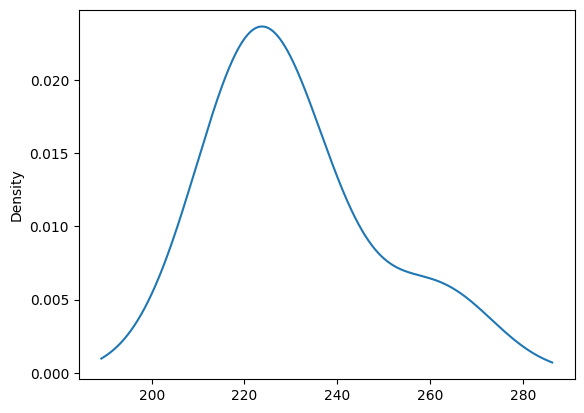

In [33]:

# Plot distribution of values in 'high' column
share_data['high'].plot(kind='kde')
print(share_data)


        date series    open    high     low  prev_close     ltp   close  \
0 2023-08-28     BE  213.35  222.25  207.55      214.50  210.10  211.15   
1 2023-08-25     BE  202.80  224.10  202.80      213.45  221.60  214.50   
2 2023-08-24     BE  213.45  213.45  213.45      224.65  213.45  213.45   
3 2023-08-23     BE  224.65  224.65  224.65      236.45  224.65  224.65   
4 2023-08-22     BE  236.45  236.45  236.45      248.90  236.45  236.45   
5 2023-08-21     BE  262.00  262.05  248.90      261.85  248.90  248.90   

     vwap  52w_high  52w_low       volume         value  num_trades  
0  216.13    262.05   202.80   87522126.0  1.891641e+10    614341.0  
1  208.11    262.05   202.80  281040185.0  5.848655e+10    668251.0  
2  213.45    262.05   213.45   27673356.0  5.906878e+09     85618.0  
3  224.65    262.05   224.65    4289046.0  9.635342e+08     70571.0  
4  236.45    262.05   236.45    7281398.0  1.721687e+09     88607.0  
5  253.78    262.05   248.90   74715306.0  1.896129e+1

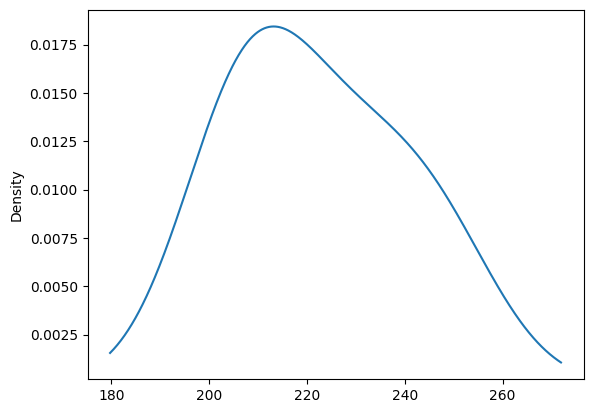

In [34]:
# Plot distribution of values in 'low' column
share_data['low'].plot(kind='kde')
print(share_data)

        date series    open    high     low  prev_close     ltp   close  \
0 2023-08-28     BE  213.35  222.25  207.55      214.50  210.10  211.15   
1 2023-08-25     BE  202.80  224.10  202.80      213.45  221.60  214.50   
2 2023-08-24     BE  213.45  213.45  213.45      224.65  213.45  213.45   
3 2023-08-23     BE  224.65  224.65  224.65      236.45  224.65  224.65   
4 2023-08-22     BE  236.45  236.45  236.45      248.90  236.45  236.45   
5 2023-08-21     BE  262.00  262.05  248.90      261.85  248.90  248.90   

     vwap  52w_high  52w_low       volume         value  num_trades  
0  216.13    262.05   202.80   87522126.0  1.891641e+10    614341.0  
1  208.11    262.05   202.80  281040185.0  5.848655e+10    668251.0  
2  213.45    262.05   213.45   27673356.0  5.906878e+09     85618.0  
3  224.65    262.05   224.65    4289046.0  9.635342e+08     70571.0  
4  236.45    262.05   236.45    7281398.0  1.721687e+09     88607.0  
5  253.78    262.05   248.90   74715306.0  1.896129e+1

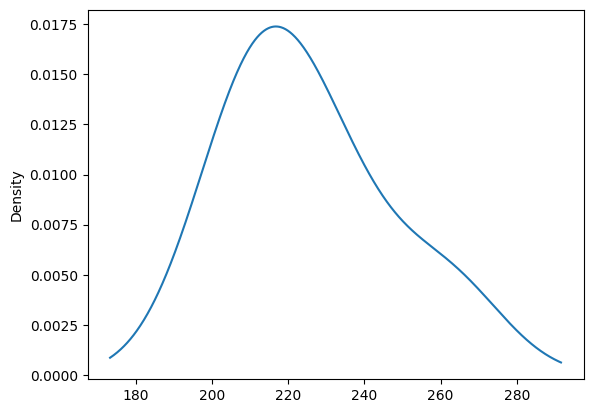

In [35]:
# Plot distribution of values in 'low' column
share_data['open'].plot(kind='kde')
print(share_data)

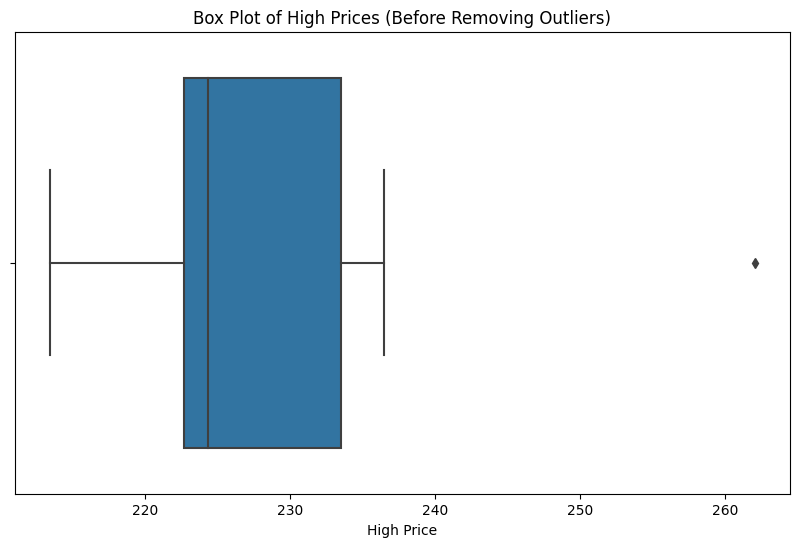

In [36]:
# # Create a box plot before removing outliers
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=share_data, x='high')
# plt.title('Box Plot of High Prices (Before Removing Outliers)')
# plt.xlabel('High Price')
# plt.show()

import matplotlib.pyplot as plt

# Create a box plot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=share_data, x='high')
plt.title('Box Plot of High Prices (Before Removing Outliers)')
plt.xlabel('High Price')
plt.show()

In [37]:
# Calculate the IQR (Interquartile Range) for the 'high' column
Q1 = share_data['high'].quantile(0.25)
Q3 = share_data['high'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outliers
outliers = share_data[(share_data['high'] < lower_bound) | (share_data['high'] > upper_bound)]
print("Outliers:")
print(outliers)

# Remove outliers
share_data = share_data[(share_data['high'] >= lower_bound) & (share_data['high'] <= upper_bound)]

Outliers:
        date series   open    high    low  prev_close    ltp  close    vwap  \
5 2023-08-21     BE  262.0  262.05  248.9      261.85  248.9  248.9  253.78   

   52w_high  52w_low      volume         value  num_trades  
5    262.05    248.9  74715306.0  1.896129e+10    347015.0  


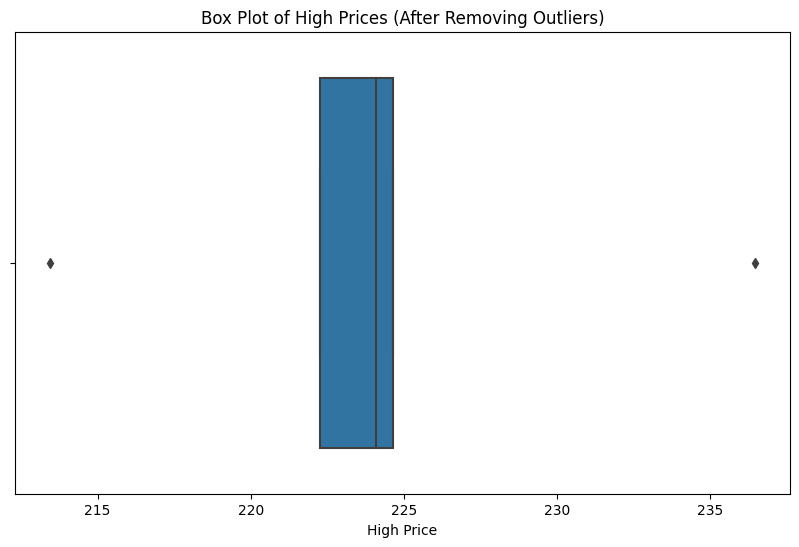

In [38]:
# Create a box plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=share_data, x='high')
plt.title('Box Plot of High Prices (After Removing Outliers)')
plt.xlabel('High Price')
plt.show()

/var/folders/m3/04l7c9kj7734jvsqqbk38y48hc0kcx/T/ipykernel_20161/1045124226.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



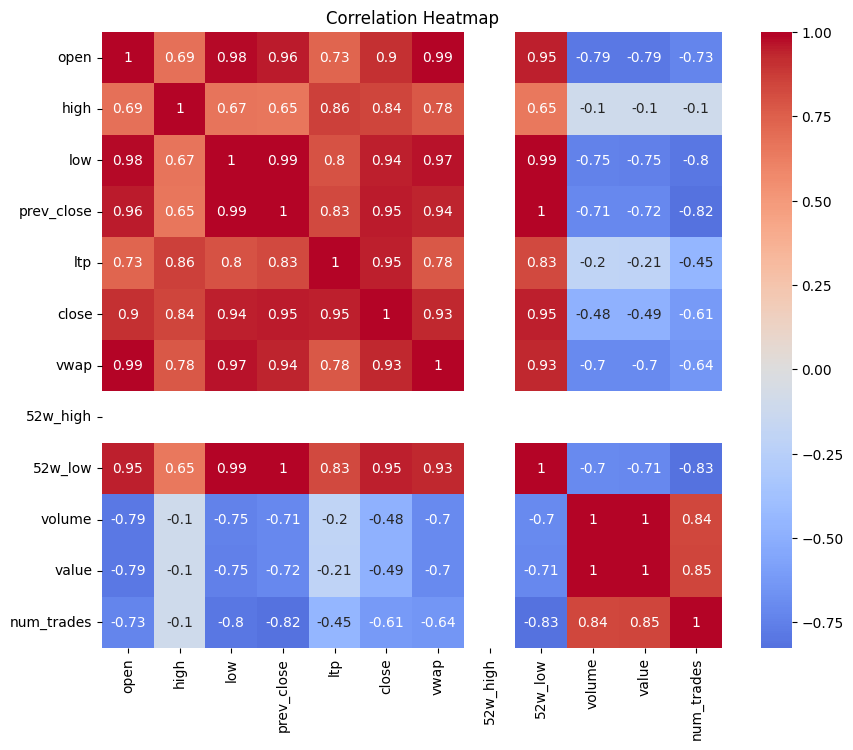

In [39]:
# Calculate correlations between numeric columns
correlation_matrix = share_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Applying Principal component analysis

In [41]:
share_data.rename(columns=column_name_mapping, inplace=True)

In [42]:
# Select the relevant numerical columns for PCA
numeric_columns = ['open', 'high', 'low', 'prev_close', 'ltp', 'close', 'vwap', '52w_high', '52w_low', 'volume', 'value', 'num_trades']
data_for_pca = share_data[numeric_columns]

data_for_pca

,open,high,low,prev_close,ltp,close,vwap,52w_high,52w_low,volume,value,num_trades
0,213.35,222.25,207.55,214.50,210.10,211.15,216.13,262.05,202.80,87522126.0,1.891641e+10,614341.0
1,202.80,224.10,202.80,213.45,221.60,214.50,208.11,262.05,202.80,281040185.0,5.848655e+10,668251.0
2,213.45,213.45,213.45,224.65,213.45,213.45,213.45,262.05,213.45,27673356.0,5.906878e+09,85618.0
3,224.65,224.65,224.65,236.45,224.65,224.65,224.65,262.05,224.65,4289046.0,9.635342e+08,70571.0
4,236.45,236.45,236.45,248.90,236.45,236.45,236.45,262.05,236.45,7281398.0,1.721687e+09,88607.0


In [43]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

data_scaled

array([[-0.41758339, -0.26281598, -0.77494856, -0.96894032, -1.20530328,
        -0.9437261 , -0.36604149,  0.        , -1.01588875,  0.05724246,
         0.07941635,  1.12398958],
       [-1.33731298, -0.01089393, -1.16529911, -1.0466628 ,  0.03783463,
        -0.58810378, -1.17520708,  0.        , -1.01588875,  1.91559307,
         1.90922672,  1.3201743 ],
       [-0.40886557, -1.46114789, -0.29009209, -0.21762296, -0.8431718 ,
        -0.69956749, -0.63643598,  0.        , -0.19810982, -0.51748426,
        -0.52217318, -0.80009447],
       [ 0.56752982,  0.06400182,  0.63031341,  0.65582973,  0.36753643,
         0.48937877,  0.49357083,  0.        ,  0.66190182, -0.74204339,
        -0.75076427, -0.85485224],
       [ 1.59623211,  1.67085598,  1.60002635,  1.57739635,  1.64310402,
         1.74201859,  1.68411372,  0.        ,  1.56798551, -0.71330788,
        -0.71570563, -0.78921716]])

In [44]:
# Determine the maximum number of components
max_components = min(data_scaled.shape[0], data_scaled.shape[1])

max_components

5

In [45]:
# Apply PCA with the number of components you want to retain
num_components = 5  # Choose an appropriate number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(data_scaled)

principal_components

array([[-2.22488356e+00,  4.37109345e-01,  1.19331170e+00,
        -1.40596933e-03,  2.42715513e-16],
       [-3.45064445e+00, -1.97036271e+00, -5.20199522e-01,
         2.94353090e-03,  2.42715513e-16],
       [-8.90980730e-01,  2.02096556e+00, -6.15962621e-01,
        -3.62840871e-02,  2.42715513e-16],
       [ 1.89927229e+00,  6.32087036e-01, -2.08772811e-01,
         6.77283744e-02,  2.42715513e-16],
       [ 4.66723645e+00, -1.11979923e+00,  1.51623255e-01,
        -3.29818488e-02,  2.42715513e-16]])

In [46]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [7.82567853e-01 1.78385090e-01 3.89197455e-02 1.27311112e-04
 5.35552913e-33]


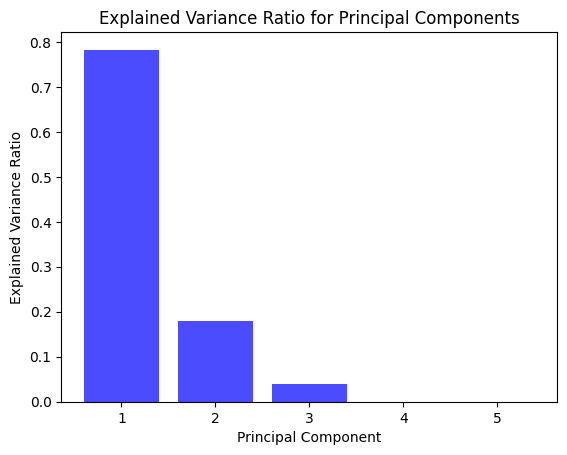

In [47]:
# Plot explained variance ratio
plt.bar(range(1, num_components + 1), explained_variance_ratio, color='b', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.show()

In [48]:
# Create a DataFrame for principal components
# principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(data_scaled.shape[1])])

# principal_df

# Create a DataFrame for principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

principal_df


,PC1,PC2,PC3,PC4,PC5
0,-2.224884,0.437109,1.193312,-0.001406,2.427155e-16
1,-3.450644,-1.970363,-0.520200,0.002944,2.427155e-16
2,-0.890981,2.020966,-0.615963,-0.036284,2.427155e-16
3,1.899272,0.632087,-0.208773,0.067728,2.427155e-16
4,4.667236,-1.119799,0.151623,-0.032982,2.427155e-16


In [49]:
# Calculate the correlation matrix between principal components
correlation_matrix = principal_df.corr()

correlation_matrix

,PC1,PC2,PC3,PC4,PC5
PC1,1.000000e+00,7.652117e-17,3.037164e-16,-8.572272e-17,-0.029712
PC2,7.652117e-17,1.000000e+00,-1.973572e-17,-6.793549e-17,-0.006146
PC3,3.037164e-16,-1.973572e-17,1.000000e+00,1.198019e-16,-0.127292
PC4,-8.572272e-17,-6.793549e-17,1.198019e-16,1.000000e+00,0.987559
PC5,-2.971184e-02,-6.146183e-03,-1.272924e-01,9.875588e-01,1.000000


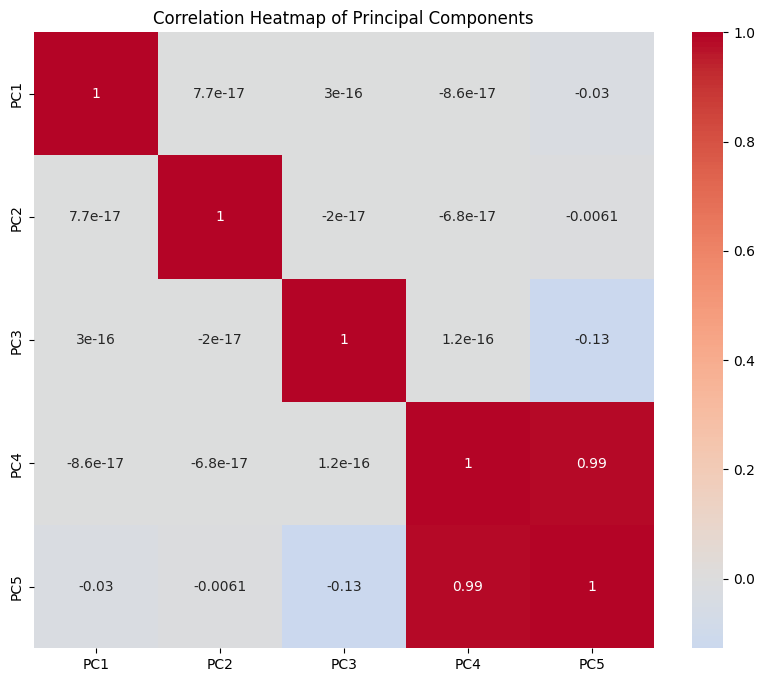

In [50]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Principal Components')
plt.show()

In [51]:
principal_components_reduced = principal_components[:, :4]

In [52]:
# Create a DataFrame for the reduced principal components
principal_df_reduced = pd.DataFrame(data=principal_components_reduced, columns=[f'PC{i+1}' for i in range(principal_components_reduced.shape[1])])

principal_df_reduced

,PC1,PC2,PC3,PC4
0,-2.224884,0.437109,1.193312,-0.001406
1,-3.450644,-1.970363,-0.520200,0.002944
2,-0.890981,2.020966,-0.615963,-0.036284
3,1.899272,0.632087,-0.208773,0.067728
4,4.667236,-1.119799,0.151623,-0.032982


In [53]:
# Calculate the correlation matrix between principal components
correlation_matrix_reduced = principal_df_reduced.corr()

correlation_matrix_reduced

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,7.652117e-17,3.037164e-16,-8.572272e-17
PC2,7.652117e-17,1.000000e+00,-1.973572e-17,-6.793549e-17
PC3,3.037164e-16,-1.973572e-17,1.000000e+00,1.198019e-16
PC4,-8.572272e-17,-6.793549e-17,1.198019e-16,1.000000e+00


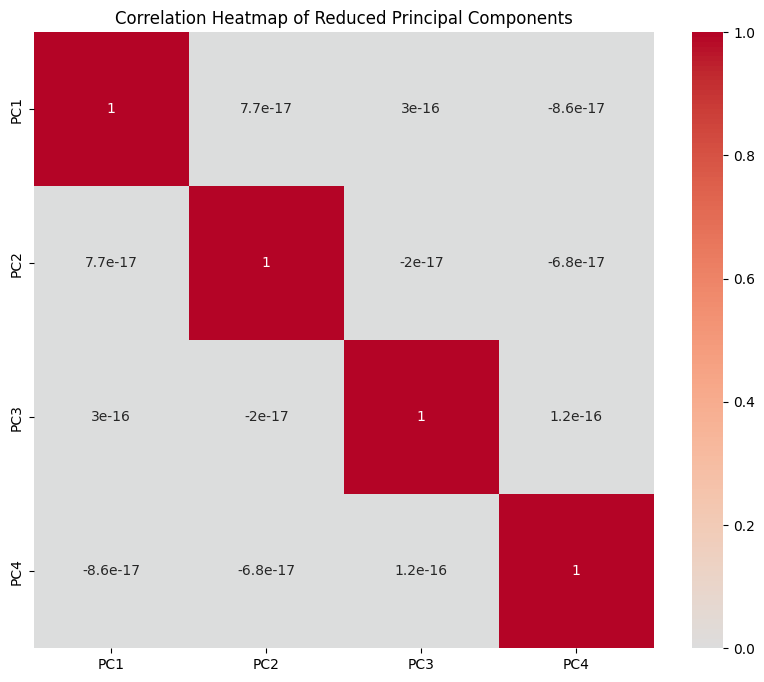

In [54]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix_reduced, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Reduced Principal Components')
plt.show()

Now we start with the modelling part and splitting data into test and train


In [55]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = principal_df_reduced  # Features (principal components)
y = share_data['high']     # Target variable

print('This is X :', X)
print('This is y:' , y)

This is X :         PC1       PC2       PC3       PC4
0 -2.224884  0.437109  1.193312 -0.001406
1 -3.450644 -1.970363 -0.520200  0.002944
2 -0.890981  2.020966 -0.615963 -0.036284
3  1.899272  0.632087 -0.208773  0.067728
4  4.667236 -1.119799  0.151623 -0.032982
This is y: 0    222.25
1    224.10
2    213.45
3    224.65
4    236.45
Name: high, dtype: float64


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Print the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4, 4)
X_test shape: (1, 4)
y_train shape: (4,)
y_test shape: (1,)


For adding Explainable AI we will move ahead with SHAP

In [ ]:
pip install shap

We will be moving forward with regression models

  Linear Rgression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)


Linear Regression Mean Squared Error: 13.615401870454997


/Users/anurag13.pandey/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


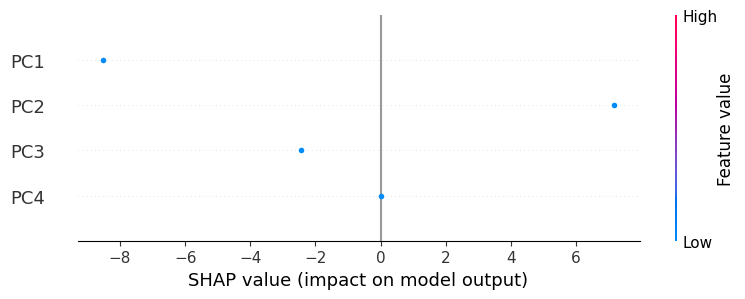

In [60]:
import shap

# Initialize the explainer
explainer = shap.Explainer(linear_reg, X_train)

# Explain the predictions on the testing set
shap_values_linear = explainer(X_test)

# Summarize the SHAP values
shap.summary_plot(shap_values_linear, X_test)

**Ridge Regression


In [61]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha value

# Train the model
ridge_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

Ridge Regression Mean Squared Error: 0.6650112762137609


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


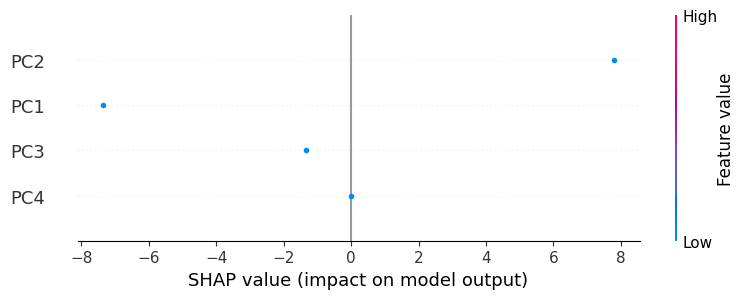

In [62]:
# Initialize the explainer
explainer = shap.Explainer(ridge_reg, X_train)

# Explain the predictions on the testing set
shap_values_ridge = explainer(X_test)

# Summarize the SHAP values
shap.summary_plot(shap_values_ridge, X_test)

Lasso Regression

In [63]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
lasso_reg = Lasso(alpha=0.01)  # You can adjust the alpha value

# Train the model
lasso_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)


Lasso Regression Mean Squared Error: 7.651283629537602


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


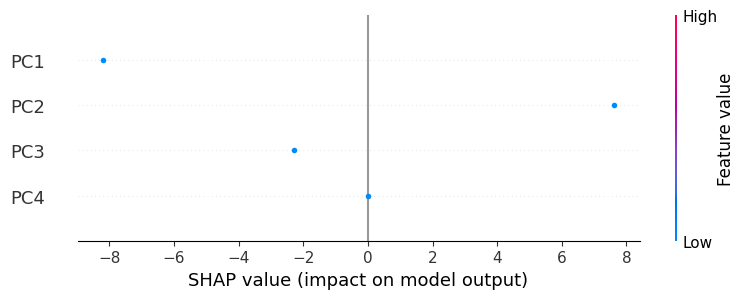

In [64]:
# Initialize the explainer
explainer = shap.Explainer(lasso_reg, X_train)

# Explain the predictions on the testing set
shap_values_lasso = explainer(X_test)

# Summarize the SHAP values
shap.summary_plot(shap_values_lasso, X_test)

Adding Explainability to tree and RF

In [65]:
pip install treeinterpreter


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [66]:
# from treeinterpreter import treeinterpreter as ti

# # Initialize the treeinterpreter explainer
# explainer_rf = ti.ExtraTreesRegressor(rf_model)

# # Explain the predictions on the testing set
# prediction_rf, bias_rf, contributions_rf = explainer_rf.predict(X_test)

# # Summarize the feature contributions
# shap.summary_plot(contributions_rf, X_test)

Applying decision Tree


In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred_tree = decision_tree_reg.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Regression Mean Squared Error:", mse_tree)


Decision Tree Regression Mean Squared Error: 113.42250000000013


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


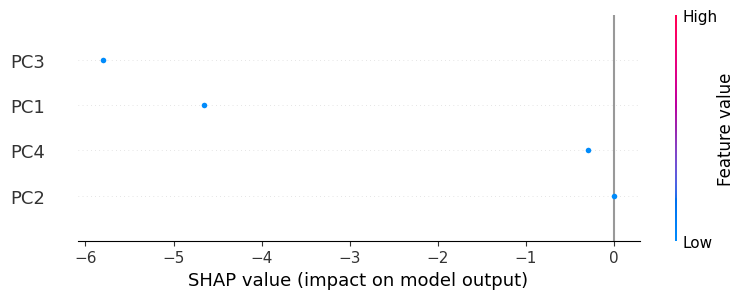

In [68]:
# Initialize the explainer
explainer_tree = shap.Explainer(decision_tree_reg, X_train)

# Explain the predictions on the testing set
shap_values_tree = explainer_tree(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values_tree, X_test)


Applying Random forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)

# Train the model
random_forest_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression Mean Squared Error:", mse_rf)


Random Forest Regression Mean Squared Error: 1.6129000000006757


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


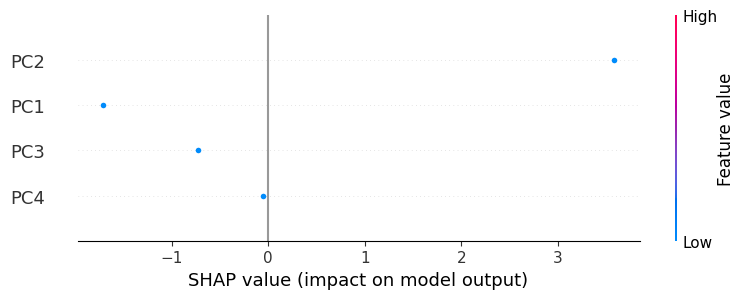

In [70]:
# Initialize the explainer
explainer_tree = shap.Explainer(random_forest_reg, X_train)

# Explain the predictions on the testing set
shap_values_rf = explainer_tree(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values_rf, X_test)